# Project Title: Tourism Experience Analytics- Classification, Predection and Recommendation System.

## Project Summary

1. Regression: Predicting Attraction Ratings
Aim: Develop a regression model to predict the rating a user might give to a tourist attraction based on historical data, user demographics, and attraction features.
2. Classification: User Visit Mode Prediction
Aim: Create a classification model to predict the mode of visit (e.g., business, family, couples, friends) based on user and attraction data.
3. Recommendations: Personalized Attraction Suggestions
Objective: Develop a recommendation system to suggest tourist attractions based on a user's historical preferences and similar users’ preferences.

In [2]:
# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# dataset loading

In [5]:
df_city = pd.read_excel('City.xlsx')

In [6]:
df_city

,CityId,CityName,CountryId
0,0,-,0
1,1,Douala,1
2,2,South Region,1
3,3,N'Djamena,2
4,4,Kigali,3
...,...,...,...
9138,9138,Yeovil,163
9139,9139,York,163
9140,9140,Yorkshire,163
9141,9141,Zaandam,163


In [7]:
df_continent = pd.read_excel('Continent.xlsx')

In [8]:
df_continent

,ContinentId,Continent
0,0,-
1,1,Africa
2,2,America
3,3,Asia
4,4,Australia & Oceania
5,5,Europe


In [9]:
df_country = pd.read_excel('Country.xlsx')

In [10]:
df_country

,CountryId,Country,RegionId
0,0,-,0
1,1,Cameroon,1
2,2,Chad,1
3,3,Rwanda,1
4,4,Ethiopia,2
...,...,...,...
160,160,Ireland,21
161,161,Monaco,21
162,162,Netherlands,21
163,163,United Kingdom,21


In [11]:
df_visitmode = pd.read_excel('Mode.xlsx')

In [12]:
df_visitmode

,VisitModeId,VisitMode
0,0,-
1,1,Business
2,2,Couples
3,3,Family
4,4,Friends
5,5,Solo


In [13]:
df_region = pd.read_excel('Region.xlsx')

In [14]:
df_region

,Region,RegionId,ContinentId
0,-,0,0
1,Central Africa,1,1
2,East Africa,2,1
3,North Africa,3,1
4,Southern Africa,4,1
5,West Africa,5,1
6,Caribbean,6,2
7,Central America,7,2
8,Northern America,8,2
9,South America,9,2


In [15]:
df_transaction = pd.read_excel('Transaction.xlsx')

In [16]:
df_transaction

,TransactionId,UserId,VisitYear,VisitMonth,VisitMode,AttractionId,Rating
0,3,70456,2022,10,2,640,5
1,8,7567,2022,10,4,640,5
2,9,79069,2022,10,3,640,5
3,10,31019,2022,10,3,640,3
4,15,43611,2022,10,2,640,3
...,...,...,...,...,...,...,...
52925,211227,87100,2018,9,2,1297,4
52926,211238,88112,2016,2,2,1297,5
52927,211239,88112,2016,2,2,1297,4
52928,211240,88112,2016,2,2,1297,4


In [17]:
df_attractiontype = pd.read_excel('Type.xlsx')

In [18]:
df_attractiontype

,AttractionTypeId,AttractionType
0,2,Ancient Ruins
1,10,Ballets
2,13,Beaches
3,19,Caverns & Caves
4,34,Flea & Street Markets
5,44,Historic Sites
6,45,History Museums
7,61,National Parks
8,63,Nature & Wildlife Areas
9,64,Neighborhoods


In [19]:
df_attraction = pd.read_excel('Updated_Item.xlsx')

In [20]:
df_attraction

,AttractionId,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress
0,369,1,13,Kuta Beach - Bali,Kuta
1,481,1,13,Nusa Dua Beach,"Semenanjung Nusa Dua, Nusa Dua 80517 Indonesia"
2,640,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia"
3,650,1,13,Sanur Beach,Sanur
4,673,1,13,Seminyak Beach,Seminyak
...,...,...,...,...,...
1693,2961,8154,Temple,Ancient Temple - Churchdown,"Main Street, Churchdown, United Kingdom"
1694,2962,9142,Temple,Ancient Temple - Sanaa,"Main Street, Sanaa, Yemen"
1695,2963,9142,Museum,Science Museum - Sanaa,"Main Street, Sanaa, Yemen"
1696,2964,9142,Park,Botanical Garden - Sanaa,"Main Street, Sanaa, Yemen"


In [21]:
df_user = pd.read_excel('User.xlsx')

In [22]:
df_user

,UserId,ContinentId,RegionId,CountryId,CityId
0,14,5,20,155,220.0
1,16,3,14,101,3098.0
2,20,4,15,109,4303.0
3,23,1,4,22,154.0
4,25,3,14,101,3098.0
...,...,...,...,...,...
33525,88179,5,21,162,7833.0
33526,88185,3,12,80,2534.0
33527,88187,3,12,88,2604.0
33528,88189,5,17,131,6129.0


In [23]:
# Merging Dataset

In [24]:
df = df_transaction.merge(df_user, on="UserId", how="left")

In [25]:
df = df.merge(
    df_visitmode,
    left_on="VisitMode",
    right_on="VisitModeId",
    how="left"
)

In [26]:
df = df.merge(df_attraction, on="AttractionId", how="left")

In [27]:
df = df.merge(df_attractiontype, on="AttractionTypeId", how="left")

In [28]:
df = df.merge(
    df_city,
    left_on="AttractionCityId",
    right_on="CityId",
    how="left",
    suffixes=("", "_AttractionCity")
)

In [29]:
df = df.merge(df_country, on="CountryId", how="left")

In [30]:
df = df.rename(columns={"RegionId_x": "RegionId"})
df = df.rename(columns={"RegionId_y": "RegionId"})
df = df.rename(columns={"VisitMode_x": "VisitMode"})
df = df.rename(columns={"VisitMode_y": "VisitMode"})

In [31]:
print(df.columns)

Index(['TransactionId', 'UserId', 'VisitYear', 'VisitMonth', 'VisitMode',
       'AttractionId', 'Rating', 'ContinentId', 'RegionId', 'CountryId',
       'CityId', 'VisitModeId', 'VisitMode', 'AttractionCityId',
       'AttractionTypeId', 'Attraction', 'AttractionAddress', 'AttractionType',
       'CityId_AttractionCity', 'CityName', 'CountryId_AttractionCity',
       'Country', 'RegionId'],
      dtype='object')


In [32]:
df.columns = [
    'TransactionId', 'UserId', 'VisitYear', 'VisitMonth', 'VisitMode',
    'AttractionId', 'Rating', 'ContinentId_user', 'RegionId_user', 'CountryId',
    'CityId', 'VisitModeId', 'VisitModeName', 'AttractionCityId',
    'AttractionTypeId', 'Attraction', 'AttractionAddress', 'AttractionType',
    'CityId_AttractionCity', 'CityName', 'CountryId_AttractionCity',
    'Country', 'RegionId_country'
]

In [33]:
df = df.drop(columns=['RegionId_user'])
df = df.rename(columns={'RegionId_country': 'RegionId'})

In [34]:
df = df.merge(df_region, on="RegionId", how="left")

In [35]:
df = df.merge(df_continent, on="ContinentId", how="left")

In [36]:
# Checking final merged dataset

In [37]:
df

,TransactionId,UserId,VisitYear,VisitMonth,VisitMode,AttractionId,Rating,ContinentId_user,CountryId,CityId,...,AttractionAddress,AttractionType,CityId_AttractionCity,CityName,CountryId_AttractionCity,Country,RegionId,Region,ContinentId,Continent
0,3,70456,2022,10,2,640,5,5,163,4341.0,...,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,1,Douala,1,United Kingdom,21,Western Europe,5,Europe
1,8,7567,2022,10,4,640,5,2,48,464.0,...,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,1,Douala,1,Canada,8,Northern America,2,America
2,9,79069,2022,10,3,640,5,2,54,774.0,...,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,1,Douala,1,Brazil,9,South America,2,America
3,10,31019,2022,10,3,640,3,5,135,583.0,...,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,1,Douala,1,Switzerland,17,Central Europe,5,Europe
4,15,43611,2022,10,2,640,3,5,163,1396.0,...,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,1,Douala,1,United Kingdom,21,Western Europe,5,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52925,211227,87100,2018,9,2,1297,4,5,159,7460.0,...,Yogyakarta,Historic Sites,3,N'Djamena,2,France,21,Western Europe,5,Europe
52926,211238,88112,2016,2,2,1297,5,5,133,6164.0,...,Yogyakarta,Historic Sites,3,N'Djamena,2,Slovakia,17,Central Europe,5,Europe
52927,211239,88112,2016,2,2,1297,4,5,133,6164.0,...,Yogyakarta,Historic Sites,3,N'Djamena,2,Slovakia,17,Central Europe,5,Europe
52928,211240,88112,2016,2,2,1297,4,5,133,6164.0,...,Yogyakarta,Historic Sites,3,N'Djamena,2,Slovakia,17,Central Europe,5,Europe


In [39]:
# Checking null values

In [38]:
df.isna().sum().sum()

8

In [35]:
df

,TransactionId,UserId,VisitYear,VisitMonth,VisitMode,AttractionId,Rating,ContinentId_user,CountryId,CityId,...,AttractionAddress,AttractionType,CityId_AttractionCity,CityName,CountryId_AttractionCity,Country,RegionId,Region,ContinentId,Continent
0,3,70456,2022,10,2,640,5,5,163,4341.0,...,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,1,Douala,1,United Kingdom,21,Western Europe,5,Europe
1,8,7567,2022,10,4,640,5,2,48,464.0,...,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,1,Douala,1,Canada,8,Northern America,2,America
2,9,79069,2022,10,3,640,5,2,54,774.0,...,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,1,Douala,1,Brazil,9,South America,2,America
3,10,31019,2022,10,3,640,3,5,135,583.0,...,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,1,Douala,1,Switzerland,17,Central Europe,5,Europe
4,15,43611,2022,10,2,640,3,5,163,1396.0,...,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,1,Douala,1,United Kingdom,21,Western Europe,5,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52925,211227,87100,2018,9,2,1297,4,5,159,7460.0,...,Yogyakarta,Historic Sites,3,N'Djamena,2,France,21,Western Europe,5,Europe
52926,211238,88112,2016,2,2,1297,5,5,133,6164.0,...,Yogyakarta,Historic Sites,3,N'Djamena,2,Slovakia,17,Central Europe,5,Europe
52927,211239,88112,2016,2,2,1297,4,5,133,6164.0,...,Yogyakarta,Historic Sites,3,N'Djamena,2,Slovakia,17,Central Europe,5,Europe
52928,211240,88112,2016,2,2,1297,4,5,133,6164.0,...,Yogyakarta,Historic Sites,3,N'Djamena,2,Slovakia,17,Central Europe,5,Europe


In [37]:
df.isna().sum().sort_values(ascending=False)

CityId                      8
TransactionId               0
AttractionTypeId            0
ContinentId                 0
Region                      0
RegionId                    0
Country                     0
CountryId_AttractionCity    0
CityName                    0
CityId_AttractionCity       0
AttractionType              0
AttractionAddress           0
Attraction                  0
AttractionCityId            0
UserId                      0
VisitModeName               0
VisitModeId                 0
CountryId                   0
ContinentId_user            0
Rating                      0
AttractionId                0
VisitMode                   0
VisitMonth                  0
VisitYear                   0
Continent                   0
dtype: int64

In [38]:
df["CityId"] = df["CityId"].fillna(0).astype(int)


In [39]:
df.isna().sum().sort_values(ascending=False)

TransactionId               0
AttractionTypeId            0
ContinentId                 0
Region                      0
RegionId                    0
Country                     0
CountryId_AttractionCity    0
CityName                    0
CityId_AttractionCity       0
AttractionType              0
AttractionAddress           0
Attraction                  0
AttractionCityId            0
UserId                      0
VisitModeName               0
VisitModeId                 0
CityId                      0
CountryId                   0
ContinentId_user            0
Rating                      0
AttractionId                0
VisitMode                   0
VisitMonth                  0
VisitYear                   0
Continent                   0
dtype: int64

In [ ]:
# Checking duplicate values.

In [40]:
df.duplicated().sum()

0

In [43]:
df

,TransactionId,UserId,VisitYear,VisitMonth,VisitMode,AttractionId,Rating,ContinentId_user,CountryId,CityId,...,AttractionAddress,AttractionType,CityId_AttractionCity,CityName,CountryId_AttractionCity,Country,RegionId,Region,ContinentId,Continent
0,3,70456,2022,10,2,640,5,5,163,4341,...,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,1,Douala,1,United Kingdom,21,Western Europe,5,Europe
1,8,7567,2022,10,4,640,5,2,48,464,...,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,1,Douala,1,Canada,8,Northern America,2,America
2,9,79069,2022,10,3,640,5,2,54,774,...,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,1,Douala,1,Brazil,9,South America,2,America
3,10,31019,2022,10,3,640,3,5,135,583,...,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,1,Douala,1,Switzerland,17,Central Europe,5,Europe
4,15,43611,2022,10,2,640,3,5,163,1396,...,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,1,Douala,1,United Kingdom,21,Western Europe,5,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52925,211227,87100,2018,9,2,1297,4,5,159,7460,...,Yogyakarta,Historic Sites,3,N'Djamena,2,France,21,Western Europe,5,Europe
52926,211238,88112,2016,2,2,1297,5,5,133,6164,...,Yogyakarta,Historic Sites,3,N'Djamena,2,Slovakia,17,Central Europe,5,Europe
52927,211239,88112,2016,2,2,1297,4,5,133,6164,...,Yogyakarta,Historic Sites,3,N'Djamena,2,Slovakia,17,Central Europe,5,Europe
52928,211240,88112,2016,2,2,1297,4,5,133,6164,...,Yogyakarta,Historic Sites,3,N'Djamena,2,Slovakia,17,Central Europe,5,Europe


In [40]:
# Histogram plot

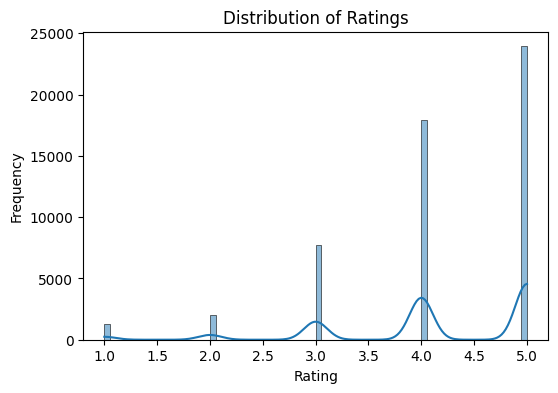

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.histplot(df['Rating'], kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [41]:
# Count plot

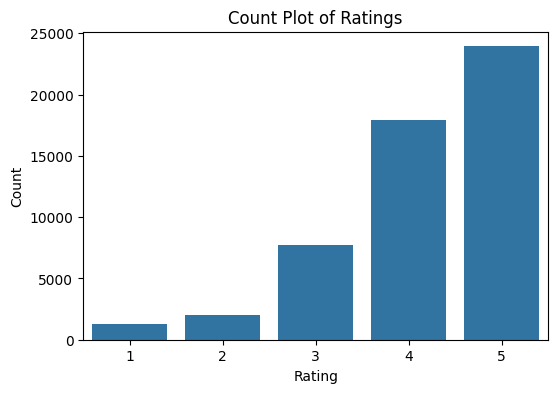

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='Rating', data=df)
plt.title('Count Plot of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [42]:
# Pair plot

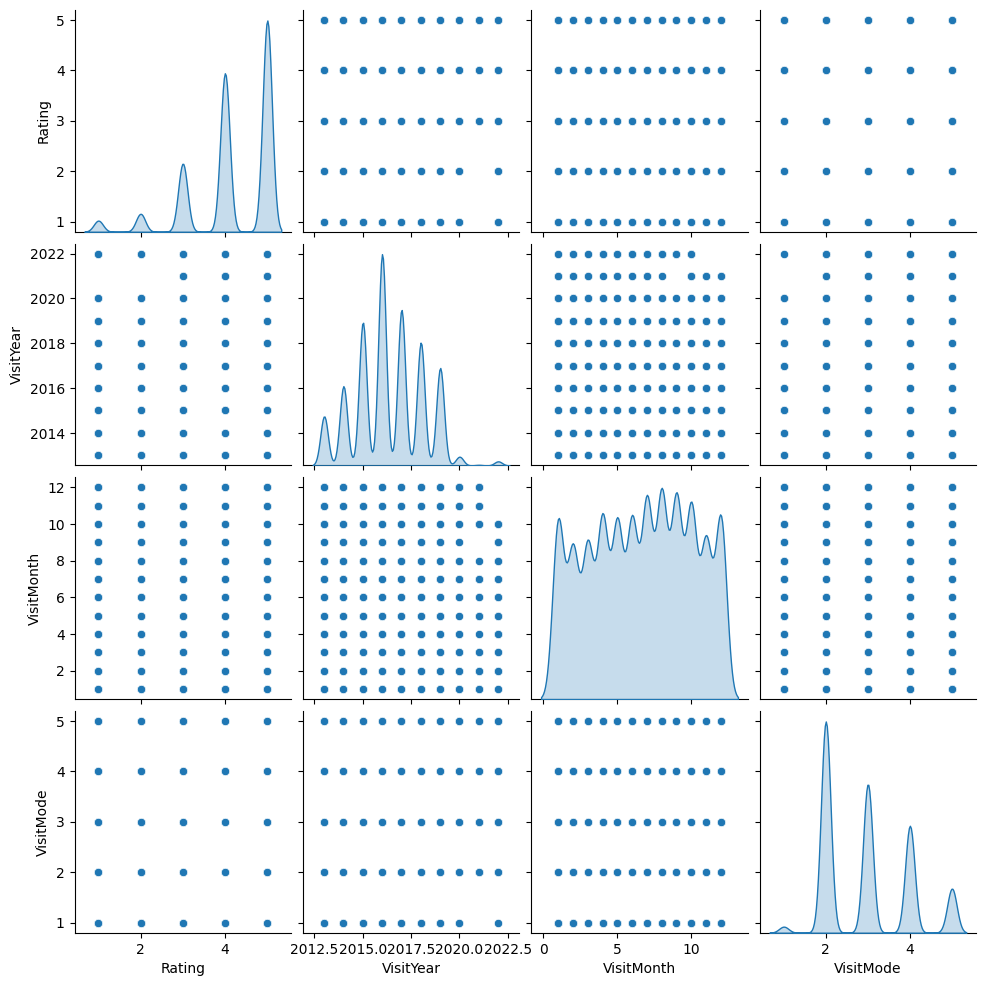

In [45]:
sns.pairplot(
    df[['Rating', 'VisitYear', 'VisitMonth', 'VisitMode']],
    diag_kind='kde'
)
plt.show()

In [44]:
#Scatter plot

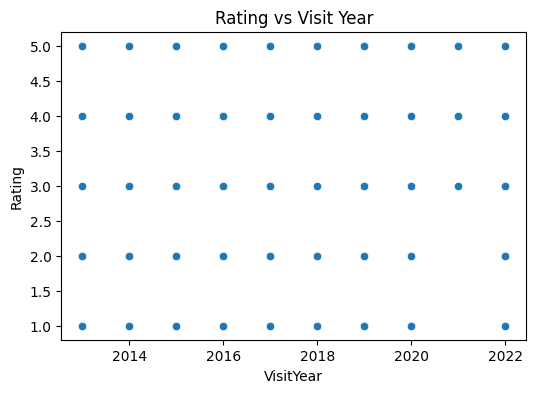

In [46]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x='VisitYear',
    y='Rating',
    data=df
)
plt.title('Rating vs Visit Year')
plt.show()

In [45]:
# Box plot

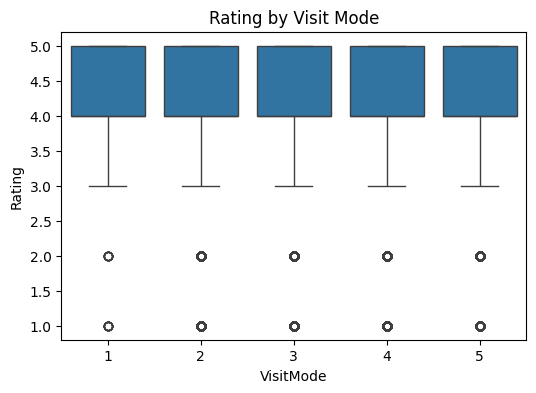

In [47]:
plt.figure(figsize=(6,4))
sns.boxplot(
    x='VisitMode',
    y='Rating',
    data=df
)
plt.title('Rating by Visit Mode')
plt.show()

In [47]:
# Heatmap

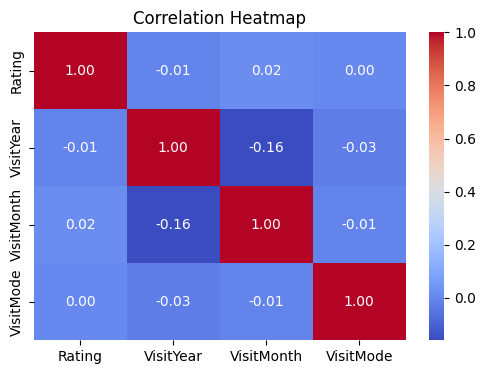

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
num_df = df[['Rating', 'VisitYear', 'VisitMonth', 'VisitMode']]

plt.figure(figsize=(6,4))
sns.heatmap(
    num_df.corr(),
    annot=True,
    cmap='coolwarm',
    fmt='.2f'
)
plt.title('Correlation Heatmap')
plt.show()

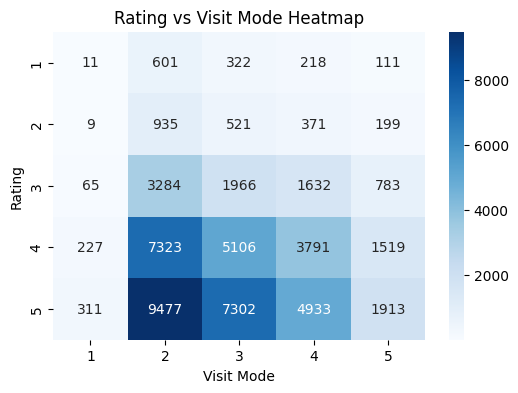

In [52]:
rating_mode = pd.crosstab(df['Rating'], df['VisitMode'])

plt.figure(figsize=(6,4))
sns.heatmap(
    rating_mode,
    annot=True,
    fmt='d',
    cmap='Blues'
)
plt.title('Rating vs Visit Mode Heatmap')
plt.xlabel('Visit Mode')
plt.ylabel('Rating')
plt.show()

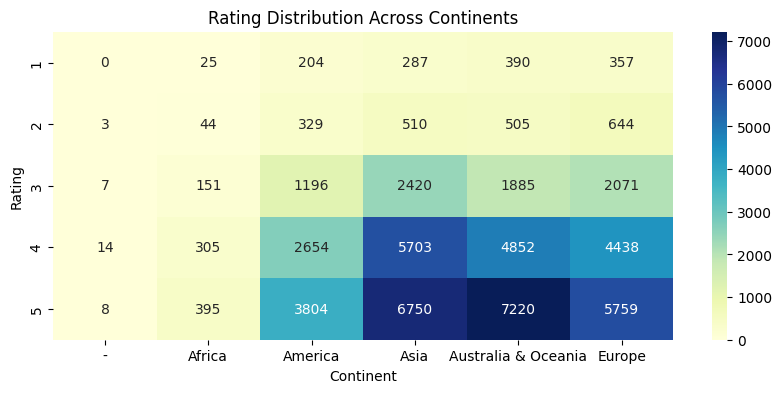

In [53]:
rating_continent = pd.crosstab(df['Rating'], df['Continent'])

plt.figure(figsize=(10,4))
sns.heatmap(
    rating_continent,
    annot=True,
    fmt='d',
    cmap='YlGnBu'
)
plt.title('Rating Distribution Across Continents')
plt.xlabel('Continent')
plt.ylabel('Rating')
plt.show()

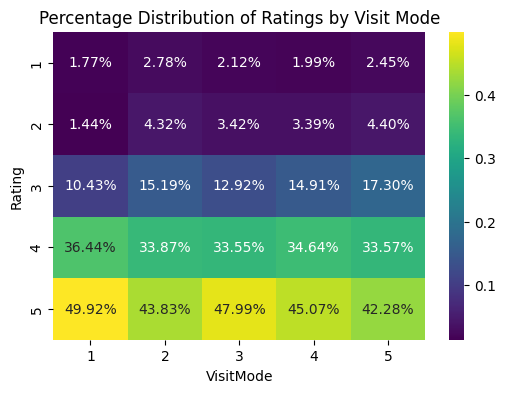

In [54]:
rating_mode_pct = pd.crosstab(
    df['Rating'],
    df['VisitMode'],
    normalize='columns'
)

plt.figure(figsize=(6,4))
sns.heatmap(
    rating_mode_pct,
    annot=True,
    fmt='.2%',
    cmap='viridis'
)
plt.title('Percentage Distribution of Ratings by Visit Mode')
plt.show()

In [55]:
df

,TransactionId,UserId,VisitYear,VisitMonth,VisitMode,AttractionId,Rating,ContinentId_user,CountryId,CityId,...,AttractionAddress,AttractionType,CityId_AttractionCity,CityName,CountryId_AttractionCity,Country,RegionId,Region,ContinentId,Continent
0,3,70456,2022,10,2,640,5,5,163,4341,...,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,1,Douala,1,United Kingdom,21,Western Europe,5,Europe
1,8,7567,2022,10,4,640,5,2,48,464,...,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,1,Douala,1,Canada,8,Northern America,2,America
2,9,79069,2022,10,3,640,5,2,54,774,...,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,1,Douala,1,Brazil,9,South America,2,America
3,10,31019,2022,10,3,640,3,5,135,583,...,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,1,Douala,1,Switzerland,17,Central Europe,5,Europe
4,15,43611,2022,10,2,640,3,5,163,1396,...,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,1,Douala,1,United Kingdom,21,Western Europe,5,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52925,211227,87100,2018,9,2,1297,4,5,159,7460,...,Yogyakarta,Historic Sites,3,N'Djamena,2,France,21,Western Europe,5,Europe
52926,211238,88112,2016,2,2,1297,5,5,133,6164,...,Yogyakarta,Historic Sites,3,N'Djamena,2,Slovakia,17,Central Europe,5,Europe
52927,211239,88112,2016,2,2,1297,4,5,133,6164,...,Yogyakarta,Historic Sites,3,N'Djamena,2,Slovakia,17,Central Europe,5,Europe
52928,211240,88112,2016,2,2,1297,4,5,133,6164,...,Yogyakarta,Historic Sites,3,N'Djamena,2,Slovakia,17,Central Europe,5,Europe


## 1. Regression: Predicting Attraction Ratings

In [70]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

In [71]:
# Define Features (X) and Target (y)

In [72]:
X = df.drop(columns=['Rating'])
y = df['Rating']

In [73]:
# Identify Categorical & Numerical Columns

In [74]:
categorical_features = [
    'Continent',
    'Region',
    'Country',
    'AttractionType',
    'VisitMode'
]

numerical_features = [
    'VisitYear',
    'VisitMonth',
    'AttractionId',
    'CityId',
    'RegionId',
    'ContinentId_user'
]

In [75]:
# Preprocessing Pipeline

In [76]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numerical_features)
    ]
)

In [77]:
# Train–Test Split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [79]:
# Linear Regression Model (Baseline)

In [80]:
from sklearn.linear_model import LinearRegression

lin_reg_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

lin_reg_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Continent', 'Region',
                                                   'Country', 'AttractionType',
                                                   'VisitMode']),
                                                 ('num', 'passthrough',
                                                  ['VisitYear', 'VisitMonth',
                                                   'AttractionId', 'CityId',
                                                   'RegionId',
                                                   'ContinentId_user'])])),
                ('model', LinearRegression())])

In [82]:
y_pred = lin_reg_model.predict(X_test)

print("MAE :", mean_absolute_error(y_test, y_pred))
print("RMSE:", root_mean_squared_error(y_test, y_pred))
print("R²  :", r2_score(y_test, y_pred))

MAE : 0.7272887377194517
RMSE: 0.9318212726930218
R²  : 0.07806757766675565


In [49]:
#Regression model plot

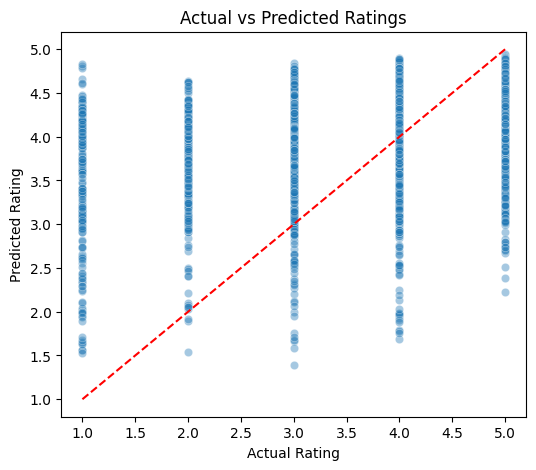

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,5))
sns.scatterplot(x=y_test, y=rf_pred, alpha=0.4)
plt.plot([1,5], [1,5], color='red', linestyle='--')  # ideal line
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs Predicted Ratings')
plt.show()

In [83]:
# Random Forest Regressor

In [84]:
from sklearn.ensemble import RandomForestRegressor

rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(
        n_estimators=300,
        max_depth=15,
        random_state=42,
        n_jobs=-1
    ))
])

rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

print("MAE :", mean_absolute_error(y_test, rf_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, rf_pred)))
print("R²  :", r2_score(y_test, rf_pred))

MAE : 0.7065555629230618
RMSE: 0.9035040943252524
R²  : 0.13324950824380766


In [85]:
# Add Historical Aggregates

In [86]:
# Attraction-level average rating
df['attr_avg_rating'] = df.groupby('AttractionId')['Rating'].transform('mean')

# Region-level average rating
df['region_avg_rating'] = df.groupby('Region')['Rating'].transform('mean')

In [ ]:
# Gradient Boosting / XGBoost

In [90]:
from xgboost import XGBRegressor

xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(
        n_estimators=300,
        max_depth=6,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ))
])

xgb_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Continent', 'Region',
                                                   'Country', 'AttractionType',
                                                   'VisitMode']),
                                                 ('num', 'passthrough',
                                                  ['VisitYear', 'VisitMonth',
                                                   'AttractionId', 'CityId',
                                                   'RegionId',
                                                   'ContinentId_user'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsa...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=300, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [93]:
rf_pred_rounded = np.clip(np.round(rf_pred), 1, 5)

In [94]:
print(rf_pred_rounded[:10])

[4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]


In [95]:
comparison = pd.DataFrame({
    'Actual Rating': y_test.values[:10],
    'Predicted Rating (rounded)': rf_pred_rounded[:10]
})

print(comparison)

   Actual Rating  Predicted Rating (rounded)
0              5                         4.0
1              5                         4.0
2              3                         4.0
3              4                         4.0
4              5                         4.0
5              4                         4.0
6              5                         4.0
7              4                         4.0
8              5                         4.0
9              5                         4.0


In [96]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("MAE :", mean_absolute_error(y_test, rf_pred_rounded))
print("RMSE:", np.sqrt(mean_squared_error(y_test, rf_pred_rounded)))
print("R²  :", r2_score(y_test, rf_pred_rounded))

MAE : 0.6808993009635368
RMSE: 0.9413160730419345
R²  : 0.05918378138543001


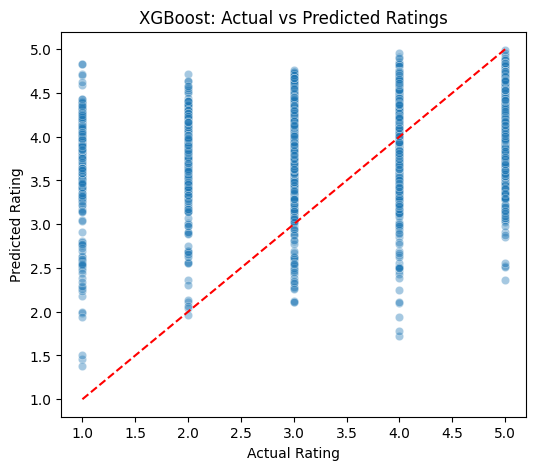

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

xgb_pred = xgb_model.predict(X_test)

plt.figure(figsize=(6,5))
sns.scatterplot(x=y_test, y=xgb_pred, alpha=0.4)
plt.plot([1,5], [1,5], 'r--')   # ideal line
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("XGBoost: Actual vs Predicted Ratings")
plt.show()

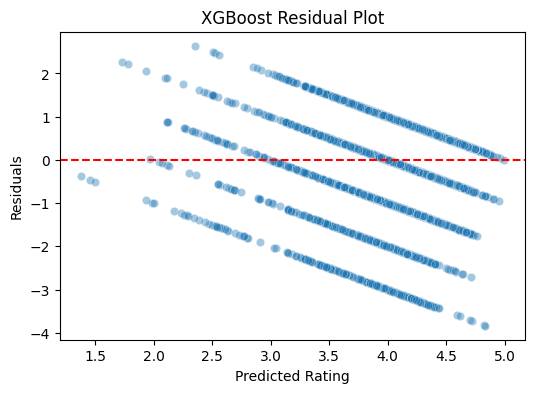

In [99]:
residuals = y_test - xgb_pred

plt.figure(figsize=(6,4))
sns.scatterplot(x=xgb_pred, y=residuals, alpha=0.4)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Rating")
plt.ylabel("Residuals")
plt.title("XGBoost Residual Plot")
plt.show()

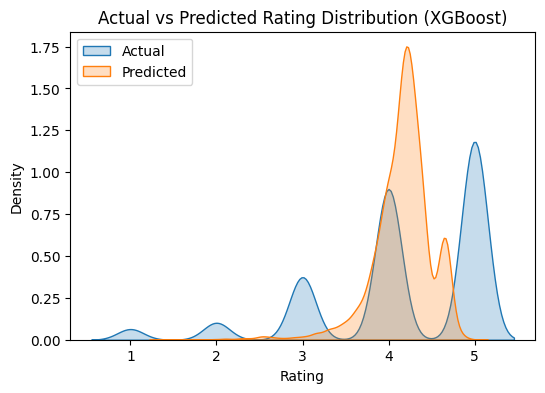

In [100]:
plt.figure(figsize=(6,4))
sns.kdeplot(y_test, label='Actual', fill=True)
sns.kdeplot(xgb_pred, label='Predicted', fill=True)
plt.title("Actual vs Predicted Rating Distribution (XGBoost)")
plt.legend()
plt.show()

In [102]:
df

,TransactionId,UserId,VisitYear,VisitMonth,VisitMode,AttractionId,Rating,ContinentId_user,CountryId,CityId,...,CityId_AttractionCity,CityName,CountryId_AttractionCity,Country,RegionId,Region,ContinentId,Continent,attr_avg_rating,region_avg_rating
0,3,70456,2022,10,2,640,5,5,163,4341,...,1,Douala,1,United Kingdom,21,Western Europe,5,Europe,4.267086,4.123272
1,8,7567,2022,10,4,640,5,2,48,464,...,1,Douala,1,Canada,8,Northern America,2,America,4.267086,4.167580
2,9,79069,2022,10,3,640,5,2,54,774,...,1,Douala,1,Brazil,9,South America,2,America,4.267086,4.025000
3,10,31019,2022,10,3,640,3,5,135,583,...,1,Douala,1,Switzerland,17,Central Europe,5,Europe,4.267086,4.107839
4,15,43611,2022,10,2,640,3,5,163,1396,...,1,Douala,1,United Kingdom,21,Western Europe,5,Europe,4.267086,4.123272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52925,211227,87100,2018,9,2,1297,4,5,159,7460,...,3,N'Djamena,2,France,21,Western Europe,5,Europe,3.538847,4.123272
52926,211238,88112,2016,2,2,1297,5,5,133,6164,...,3,N'Djamena,2,Slovakia,17,Central Europe,5,Europe,3.538847,4.107839
52927,211239,88112,2016,2,2,1297,4,5,133,6164,...,3,N'Djamena,2,Slovakia,17,Central Europe,5,Europe,3.538847,4.107839
52928,211240,88112,2016,2,2,1297,4,5,133,6164,...,3,N'Djamena,2,Slovakia,17,Central Europe,5,Europe,3.538847,4.107839


## 2. Classification: User Visit Mode Prediction

In [112]:
# XGboost model

In [113]:
# If not installed
# pip install xgboost scikit-learn pandas numpy

import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [118]:
# Copy dataframe
data = df.copy()

# Encode target (Visit Mode)
label_encoder = LabelEncoder()
data["visit_mode_encoded"] = label_encoder.fit_transform(data["VisitMode"])

# Separate features and target
X = data.drop(["VisitMode", "visit_mode_encoded"], axis=1)
y = data["visit_mode_encoded"]

In [119]:
# Automatically detect categorical columns
categorical_cols = X.select_dtypes(include=["object"]).columns

# One-hot encode
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [126]:
# Drop ALL columns containing "VisitMode"
X = X.drop(columns=[col for col in X.columns if "VisitMode" in col], errors="ignore")

# Also drop encoded target if still present
X = X.drop(columns=["visit_mode_encoded"], errors="ignore")

In [127]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [128]:
model = XGBClassifier(
    objective="multi:softprob",   # Multi-class classification
    num_class=len(np.unique(y)),
    eval_metric="mlogloss",
    max_depth=6,
    learning_rate=0.1,
    n_estimators=200,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_class=5, num_parallel_tree=None, ...)

In [129]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.06      0.10       125
           1       0.50      0.81      0.62      4324
           2       0.54      0.43      0.48      3043
           3       0.41      0.20      0.27      2189
           4       0.56      0.05      0.09       905

    accuracy                           0.50     10586
   macro avg       0.56      0.31      0.31     10586
weighted avg       0.50      0.50      0.45     10586

Confusion Matrix:
[[   7   46   31   39    2]
 [   0 3493  564  253   14]
 [   0 1505 1306  225    7]
 [   1 1326  404  447   11]
 [   1  626  120  115   43]]


In [132]:
# Add Class Weights

In [133]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)

class_weights = dict(zip(classes, weights))
print(class_weights)

{0: 17.00562248995984, 1: 0.48963922294172063, 2: 0.6956464596681452, 3: 0.967199634536318, 4: 2.339447513812155}


In [134]:
sample_weights = y_train.map(class_weights)

In [135]:
model = XGBClassifier(
    objective="multi:softprob",
    eval_metric="mlogloss",
    max_depth=6,
    learning_rate=0.1,
    n_estimators=300
)

model.fit(X_train, y_train, sample_weight=sample_weights)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [136]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    log_loss
)

# Predictions
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Macro Precision:", precision_score(y_test, y_pred, average='macro'))
print("Macro Recall:", recall_score(y_test, y_pred, average='macro'))
print("Macro F1:", f1_score(y_test, y_pred, average='macro'))

print("Weighted F1:", f1_score(y_test, y_pred, average='weighted'))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.4095975817116947
Macro Precision: 0.3349374980675013
Macro Recall: 0.41550283584259484
Macro F1: 0.3254319324486606
Weighted F1: 0.4286607446756838

Classification Report:

              precision    recall  f1-score   support

           0       0.07      0.58      0.12       125
           1       0.56      0.48      0.52      4324
           2       0.52      0.46      0.49      3043
           3       0.35      0.22      0.27      2189
           4       0.18      0.34      0.23       905

    accuracy                           0.41     10586
   macro avg       0.33      0.42      0.33     10586
weighted avg       0.47      0.41      0.43     10586


Confusion Matrix:

[[  72   10   14   14   15]
 [ 317 2081  753  457  716]
 [ 315  685 1398  299  346]
 [ 273  657  406  473  380]
 [  95  273  108  117  312]]


In [143]:
model = XGBClassifier(
    objective="multi:softprob",
    eval_metric="mlogloss",
    max_depth=7,
    learning_rate=0.03,
    n_estimators=700,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=2,
    min_child_weight=5
)

In [144]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

model.fit(X_train_res, y_train_res)

C:\Users\Administrator\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=2, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.03, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=700,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [148]:
model = XGBClassifier(
    objective="multi:softprob",
    eval_metric="mlogloss",
    max_depth=7,
    learning_rate=0.05,
    n_estimators=300,   # control manually
    subsample=0.8,
    colsample_bytree=0.8
)

model.fit(X_train, y_train, sample_weight=sample_weights)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [149]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)

# Predictions
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print("Macro Precision:", precision_score(y_test, y_pred, average='macro'))
print("Macro Recall:", recall_score(y_test, y_pred, average='macro'))
print("Macro F1:", f1_score(y_test, y_pred, average='macro'))

print("Weighted F1:", f1_score(y_test, y_pred, average='weighted'))

print("\nDetailed Classification Report:\n")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.42197241639901756
Macro Precision: 0.34081315749741525
Macro Recall: 0.4170922426089006
Macro F1: 0.33610962775634967
Weighted F1: 0.43869125432455125

Detailed Classification Report:

              precision    recall  f1-score   support

           0       0.08      0.54      0.13       125
           1       0.56      0.49      0.52      4324
           2       0.53      0.47      0.50      3043
           3       0.36      0.24      0.29      2189
           4       0.18      0.35      0.24       905

    accuracy                           0.42     10586
   macro avg       0.34      0.42      0.34     10586
weighted avg       0.47      0.42      0.44     10586


Confusion Matrix:

[[  67   13   14   17   14]
 [ 255 2132  748  483  706]
 [ 251  698 1429  331  334]
 [ 232  670  400  525  362]
 [  78  288  106  119  314]]


In [150]:
sample_weights = y_train.map(class_weights) * 0.7

In [156]:
from xgboost import XGBClassifier

model = XGBClassifier(
    objective="multi:softprob",
    eval_metric="mlogloss",
    num_class=5,
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    random_state=42
)

In [157]:
model.fit(X_train, y_train)

print("Model trained successfully!")

Model trained successfully!


In [158]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)

# Predictions
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Macro metrics (important for imbalance)
print("Macro Precision:", precision_score(y_test, y_pred, average='macro'))
print("Macro Recall:", recall_score(y_test, y_pred, average='macro'))
print("Macro F1:", f1_score(y_test, y_pred, average='macro'))

# Weighted metrics
print("Weighted F1:", f1_score(y_test, y_pred, average='weighted'))

# Full report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.49102588324201774
Macro Precision: 0.5336754894501312
Macro Recall: 0.2921654144988815
Macro F1: 0.2856807692308853
Weighted F1: 0.4407656747329236

Classification Report:

              precision    recall  f1-score   support

           0       0.75      0.02      0.05       125
           1       0.49      0.81      0.61      4324
           2       0.54      0.40      0.46      3043
           3       0.39      0.19      0.26      2189
           4       0.50      0.03      0.05       905

    accuracy                           0.49     10586
   macro avg       0.53      0.29      0.29     10586
weighted avg       0.49      0.49      0.44     10586


Confusion Matrix:

[[   3   48   33   39    2]
 [   0 3523  537  253   11]
 [   0 1589 1232  216    6]
 [   1 1381  386  415    6]
 [   0  631  112  137   25]]


In [159]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

classes = np.unique(y_train)
weights = compute_class_weight('balanced', classes=classes, y=y_train)

class_weights = dict(zip(classes, weights))
sample_weights = y_train.map(class_weights)

model.fit(X_train, y_train, sample_weight=sample_weights)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_class=5, num_parallel_tree=None, ...)

In [160]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)

# Predictions
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Macro metrics (important for imbalance)
print("Macro Precision:", precision_score(y_test, y_pred, average='macro'))
print("Macro Recall:", recall_score(y_test, y_pred, average='macro'))
print("Macro F1:", f1_score(y_test, y_pred, average='macro'))

# Weighted metrics
print("Weighted F1:", f1_score(y_test, y_pred, average='weighted'))

# Full report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.3924995276780654
Macro Precision: 0.32604047197196034
Macro Recall: 0.40377940038928795
Macro F1: 0.3034300448280794
Weighted F1: 0.41099150989300676

Classification Report:

              precision    recall  f1-score   support

           0       0.06      0.62      0.11       125
           1       0.55      0.49      0.52      4324
           2       0.52      0.44      0.48      3043
           3       0.35      0.15      0.21      2189
           4       0.15      0.31      0.21       905

    accuracy                           0.39     10586
   macro avg       0.33      0.40      0.30     10586
weighted avg       0.46      0.39      0.41     10586


Confusion Matrix:

[[  78   11   12   10   14]
 [ 380 2132  725  316  771]
 [ 394  743 1332  203  371]
 [ 362  707  384  329  407]
 [ 132  303  106   80  284]]


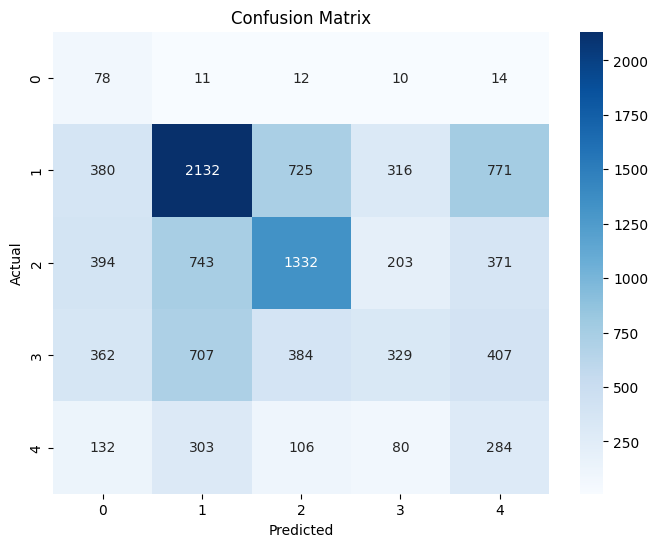

In [165]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [163]:
df

,TransactionId,UserId,VisitYear,VisitMonth,VisitMode,AttractionId,Rating,ContinentId_user,CountryId,CityId,...,CityName,CountryId_AttractionCity,Country,RegionId,Region,ContinentId,Continent,attr_avg_rating,region_avg_rating,user_total_visits
0,3,70456,2022,10,2,640,5,5,163,4341,...,Douala,1,United Kingdom,21,Western Europe,5,Europe,4.267086,4.123272,1
1,8,7567,2022,10,4,640,5,2,48,464,...,Douala,1,Canada,8,Northern America,2,America,4.267086,4.167580,1
2,9,79069,2022,10,3,640,5,2,54,774,...,Douala,1,Brazil,9,South America,2,America,4.267086,4.025000,1
3,10,31019,2022,10,3,640,3,5,135,583,...,Douala,1,Switzerland,17,Central Europe,5,Europe,4.267086,4.107839,2
4,15,43611,2022,10,2,640,3,5,163,1396,...,Douala,1,United Kingdom,21,Western Europe,5,Europe,4.267086,4.123272,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52925,211227,87100,2018,9,2,1297,4,5,159,7460,...,N'Djamena,2,France,21,Western Europe,5,Europe,3.538847,4.123272,4
52926,211238,88112,2016,2,2,1297,5,5,133,6164,...,N'Djamena,2,Slovakia,17,Central Europe,5,Europe,3.538847,4.107839,4
52927,211239,88112,2016,2,2,1297,4,5,133,6164,...,N'Djamena,2,Slovakia,17,Central Europe,5,Europe,3.538847,4.107839,4
52928,211240,88112,2016,2,2,1297,4,5,133,6164,...,N'Djamena,2,Slovakia,17,Central Europe,5,Europe,3.538847,4.107839,4


## 3. Recommendations: Personalized Attraction Suggestions

In [171]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [172]:
df.head()

,transactionid,userid,visityear,visitmonth,visitmode,attractionid,rating,continentid_user,countryid,cityid,...,cityname,countryid_attractioncity,country,regionid,region,continentid,continent,attr_avg_rating,region_avg_rating,user_total_visits
0,3,70456,2022,10,2,640,5,5,163,4341,...,Douala,1,United Kingdom,21,Western Europe,5,Europe,4.267086,4.123272,1
1,8,7567,2022,10,4,640,5,2,48,464,...,Douala,1,Canada,8,Northern America,2,America,4.267086,4.167580,1
2,9,79069,2022,10,3,640,5,2,54,774,...,Douala,1,Brazil,9,South America,2,America,4.267086,4.025000,1
3,10,31019,2022,10,3,640,3,5,135,583,...,Douala,1,Switzerland,17,Central Europe,5,Europe,4.267086,4.107839,2
4,15,43611,2022,10,2,640,3,5,163,1396,...,Douala,1,United Kingdom,21,Western Europe,5,Europe,4.267086,4.123272,3


In [174]:
# Standardize column names
df.columns = df.columns.str.lower()

# Keep only needed columns
df = df[['userid',
         'attractionid',
         'rating',
         'attraction',
         'attractiontype',
         'cityname',
         'country',
         'region',
         'continent']]

# Remove duplicates
df = df.drop_duplicates()

# Drop missing values
df = df.dropna()

df.head()

,userid,attractionid,rating,attraction,attractiontype,cityname,country,region,continent
0,70456,640,5,Sacred Monkey Forest Sanctuary,Nature & Wildlife Areas,Douala,United Kingdom,Western Europe,Europe
1,7567,640,5,Sacred Monkey Forest Sanctuary,Nature & Wildlife Areas,Douala,Canada,Northern America,America
2,79069,640,5,Sacred Monkey Forest Sanctuary,Nature & Wildlife Areas,Douala,Brazil,South America,America
3,31019,640,3,Sacred Monkey Forest Sanctuary,Nature & Wildlife Areas,Douala,Switzerland,Central Europe,Europe
4,43611,640,3,Sacred Monkey Forest Sanctuary,Nature & Wildlife Areas,Douala,United Kingdom,Western Europe,Europe


In [175]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [176]:
# Collaborative Filtering (SVD)

In [177]:
user_item_matrix = train_df.pivot_table(
    index='userid',
    columns='attractionid',
    values='rating'
)

user_item_matrix = user_item_matrix.fillna(0)

user_item_matrix.shape

(28310, 30)

In [179]:
# Get number of features (attractions)
n_features = user_item_matrix.shape[1]

# Set components safely
n_components = min(20, n_features - 1)

print("Using n_components =", n_components)

svd = TruncatedSVD(n_components=n_components, random_state=42)

latent_matrix = svd.fit_transform(user_item_matrix)

reconstructed_matrix = np.dot(latent_matrix, svd.components_)

predicted_ratings = pd.DataFrame(
    reconstructed_matrix,
    index=user_item_matrix.index,
    columns=user_item_matrix.columns
)

predicted_ratings.head()

Using n_components = 20


attractionid,369,481,640,650,673,737,748,749,824,841,...,1133,1137,1166,1171,1220,1225,1238,1278,1280,1297
userid,,,,,,,,,,,,,,,,,,,,,
16,-3.683155e-06,4.999999e+00,4.000000e+00,-2.555660e-06,2.858860e-06,-3.607094e-06,4.999995e+00,-4.221348e-06,4.999992e+00,8.546137e-08,...,-0.000071,0.001473,-3.790118e-05,-0.000003,6.996942e-07,0.000022,8.319095e-06,-0.000035,-0.000057,-1.697962e-05
20,4.918726e-08,-3.984359e-07,-1.012930e-07,-1.965008e-07,1.228808e-07,2.421799e-07,2.347478e-07,-6.237783e-07,3.130916e-07,3.999999e+00,...,-0.000009,0.000681,-1.300114e-06,0.000001,3.632998e-06,0.000002,-4.354119e-07,-0.000002,-0.000005,7.340893e-07
25,-1.697931e-04,9.392737e-05,5.828193e-05,-2.009861e-04,1.066219e-04,-4.407509e-04,-2.820580e-04,-4.702569e-04,-8.571915e-05,-8.135606e-06,...,-0.002691,0.037452,-2.314808e-03,-0.001306,-3.730577e-03,0.000906,-6.890631e-03,-0.003612,-0.006476,-4.655226e-03
26,-4.691159e-06,3.635561e-06,8.813651e-07,-3.882296e-06,1.144824e-06,-2.984765e-06,4.999993e+00,-1.953932e-06,-2.154130e-06,2.934347e-07,...,0.000028,0.001607,-8.190900e-06,-0.000005,-3.153229e-05,0.000020,-7.249281e-05,-0.000021,-0.000054,-3.701612e-05
27,-5.051583e-08,-2.307661e-07,4.000000e+00,9.538150e-07,-5.919420e-09,3.259186e-07,7.050921e-07,9.856643e-07,-7.252649e-08,-1.012930e-07,...,0.000002,-0.000353,8.797595e-07,0.000002,7.435269e-06,-0.000002,1.161871e-05,0.000002,0.000011,1.143424e-05


In [191]:
# Make sure ONE row per attraction
attraction_features = df[['attractionid',
                          'attractiontype',
                          'cityname',
                          'country',
                          'region',
                          'continent']] \
                          .drop_duplicates(subset='attractionid') \
                          .set_index('attractionid')

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoded_features = encoder.fit_transform(attraction_features)

feature_df = pd.DataFrame(
    encoded_features,
    index=attraction_features.index,
    columns=encoder.get_feature_names_out()
)

print("Index unique:", feature_df.index.is_unique)

Index unique: True


In [192]:
content_similarity = cosine_similarity(feature_df)

content_similarity_df = pd.DataFrame(
    content_similarity,
    index=feature_df.index,
    columns=feature_df.index
)

content_similarity_df.shape

(30, 30)

## Collaborative Recommendation

In [193]:
def collaborative_recommend(userid, top_n=10):
    
    if userid not in predicted_ratings.index:
        return pd.Series()
    
    user_predictions = predicted_ratings.loc[userid]
    
    visited = train_df[train_df['userid'] == userid]['attractionid']
    
    user_predictions = user_predictions.drop(visited, errors='ignore')
    
    return user_predictions.sort_values(ascending=False).head(top_n)

##  Content-Based Recommendation

In [194]:
def content_based_recommend(userid, top_n=10):
    
    visited = train_df[train_df['userid'] == userid]
    
    if visited.empty:
        return pd.Series()
    
    liked = visited[visited['rating'] >= 4]['attractionid']
    
    similarity_scores = pd.Series(dtype=float)
    
    for attraction in liked:
        if attraction in content_similarity_df.index:
            similarity_scores = similarity_scores.add(
                content_similarity_df[attraction],
                fill_value=0
            )
    
    similarity_scores = similarity_scores.drop(visited['attractionid'], errors='ignore')
    
    return similarity_scores.sort_values(ascending=False).head(top_n)

## Hybrid Recommendation

In [195]:
def hybrid_recommend(userid, alpha=0.7, top_n=10):
    
    collab_scores = collaborative_recommend(userid, top_n=100)
    content_scores = content_based_recommend(userid, top_n=100)
    
    # Normalize
    if not collab_scores.empty:
        collab_scores = (collab_scores - collab_scores.min()) / \
                        (collab_scores.max() - collab_scores.min() + 1e-9)
    
    if not content_scores.empty:
        content_scores = (content_scores - content_scores.min()) / \
                         (content_scores.max() - content_scores.min() + 1e-9)
    
    combined = pd.Series(dtype=float)
    
    for attraction in set(collab_scores.index).union(content_scores.index):
        
        c_score = collab_scores.get(attraction, 0)
        cb_score = content_scores.get(attraction, 0)
        
        combined[attraction] = alpha * c_score + (1 - alpha) * cb_score
    
    return combined.sort_values(ascending=False).head(top_n)

In [196]:
def get_recommendations_with_names(userid, top_n=5):
    
    recs = hybrid_recommend(userid, top_n=top_n)
    
    rec_df = pd.DataFrame({
        'attractionid': recs.index,
        'score': recs.values
    })
    
    rec_df = rec_df.merge(
        df[['attractionid', 'attraction']].drop_duplicates(),
        on='attractionid',
        how='left'
    )
    
    return rec_df

In [197]:
sample_user = df['userid'].iloc[0]

get_recommendations_with_names(sample_user, top_n=5)

,attractionid,score,attraction
0,913,0.700000,Goa Cina Beach
1,749,0.639555,Tegenungan Waterfall
2,748,0.639392,Tegalalang Rice Terrace
3,737,0.639170,Tanah Lot Temple
4,481,0.638846,Nusa Dua Beach


In [198]:
def evaluate_rmse():
    
    test_matrix = test_df.pivot_table(
        index='userid',
        columns='attractionid',
        values='rating'
    ).fillna(0)
    
    common_users = test_matrix.index.intersection(predicted_ratings.index)
    common_items = test_matrix.columns.intersection(predicted_ratings.columns)
    
    y_true = test_matrix.loc[common_users, common_items].values.flatten()
    y_pred = predicted_ratings.loc[common_users, common_items].values.flatten()
    
    mask = y_true > 0
    
    return np.sqrt(mean_squared_error(y_true[mask], y_pred[mask]))

print("RMSE:", evaluate_rmse())

RMSE: 3.911814388493969


In [199]:
# MAP evaluation

In [204]:
import numpy as np

def average_precision_at_k(actual, predicted, k=10):
    if len(actual) == 0:
        return 0.0

    predicted = predicted[:k]

    score = 0.0
    hits = 0.0

    for i, p in enumerate(predicted):
        if p in actual:
            hits += 1
            score += hits / (i + 1)

    return score / min(len(actual), k)


def mean_average_precision_at_k(k=10):

    ap_scores = []

    test_users = test_df['userid'].unique()

    for user in test_users:

        # Relevant items = rating >= 4
        actual_items = set(
            test_df[
                (test_df['userid'] == user) &
                (test_df['rating'] >= 4)
            ]['attractionid']
        )

        if len(actual_items) == 0:
            continue

        recs = hybrid_recommend(user, top_n=k)

        predicted_items = list(recs.index)

        ap = average_precision_at_k(actual_items, predicted_items, k)
        ap_scores.append(ap)

    return np.mean(ap_scores)

In [205]:
map10 = mean_average_precision_at_k(k=10)
print("MAP@10:", map10)

MAP@10: 0.04765225412934733


In [206]:
# Improve

In [207]:
# Popularity score
popularity = df.groupby('attractionid')['userid'] \
               .count() \
               .sort_values(ascending=False)

popularity = (popularity - popularity.min()) / \
             (popularity.max() - popularity.min())

popularity.name = "popularity"

In [208]:
attr_avg = df.groupby('attractionid')['rating'].mean()

attr_avg = (attr_avg - attr_avg.min()) / \
           (attr_avg.max() - attr_avg.min())

attr_avg.name = "attr_score"

In [211]:
def mean_average_precision_at_k(k=10):

    ap_scores = []

    test_users = test_df['userid'].unique()

    for user in test_users:

        # Relevant items (rating >= 4)
        actual_items = set(
            test_df[
                (test_df['userid'] == user) &
                (test_df['rating'] >= 4)
            ]['attractionid']
        )

        if len(actual_items) == 0:
            continue

        # Use improved model here
        recs = improved_recommend(user, top_n=k)

        predicted_items = list(recs.index)

        ap = average_precision_at_k(actual_items, predicted_items, k)
        ap_scores.append(ap)

    return np.mean(ap_scores)

In [213]:
print("Improved MAP@10:", mean_average_precision_at_k(10))

Improved MAP@10: 0.4293857004560006


In [214]:
df.to_excel('df.xlsx')

<center>
Thank You
</center>